## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  15.563559   675.281028  0.925163  3.445085  624.950562
1  50.466512   154.482447  0.139011  4.847031   54.806644
2   2.919493   424.414318  0.053117  2.965388   22.665200
3  80.500468  1400.948966  0.549563  2.629278  774.152923
4  71.088860  1739.466899  0.145688  1.370771  263.331227


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9834104	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.9733633	total: 69.4ms	remaining: 34.6s
2:	learn: 0.9643592	total: 69.9ms	remaining: 23.2s
3:	learn: 0.9541749	total: 70.5ms	remaining: 17.5s
4:	learn: 0.9416343	total: 70.9ms	remaining: 14.1s
5:	learn: 0.9303463	total: 71.6ms	remaining: 11.9s
6:	learn: 0.9184460	total: 72ms	remaining: 10.2s
7:	learn: 0.9057715	total: 72.5ms	remaining: 8.98s
8:	learn: 0.8951265	total: 73ms	remaining: 8.04s
9:	learn: 0.8838572	total: 73.5ms	remaining: 7.28s
10:	learn: 0.8746943	total: 73.9ms	remaining: 6.64s
11:	learn: 0.8613991	total: 74.3ms	remaining: 6.12s
12:	learn: 0.8496233	total: 74.8ms	remaining: 5.68s
13:	learn: 0.8373963	total: 75.4ms	remaining: 5.31s
14:	learn: 0.8278394	total: 75.9ms	remaining: 4.99s
15:	learn: 0.8180610	total: 76.4ms	remaining: 4.7s
16:	learn: 0.8082211	total: 76.8ms	remaining: 4.44s
17:	learn: 0.7978628	total: 77.4ms	remaining: 4.22s
18:	learn: 0.7907911	total: 77.9ms	remaining: 4.0

93:	learn: 0.3436955	total: 109ms	remaining: 1.05s
94:	learn: 0.3399360	total: 109ms	remaining: 1.04s
95:	learn: 0.3367815	total: 110ms	remaining: 1.03s
96:	learn: 0.3331159	total: 110ms	remaining: 1.02s
97:	learn: 0.3302275	total: 110ms	remaining: 1.01s
98:	learn: 0.3270373	total: 111ms	remaining: 1.01s
99:	learn: 0.3228277	total: 111ms	remaining: 1s
100:	learn: 0.3192713	total: 112ms	remaining: 993ms
101:	learn: 0.3160394	total: 112ms	remaining: 986ms
102:	learn: 0.3135841	total: 113ms	remaining: 981ms
103:	learn: 0.3103659	total: 113ms	remaining: 974ms
104:	learn: 0.3080411	total: 113ms	remaining: 967ms
105:	learn: 0.3045872	total: 114ms	remaining: 961ms
106:	learn: 0.3017993	total: 114ms	remaining: 954ms
107:	learn: 0.2986782	total: 115ms	remaining: 948ms
108:	learn: 0.2953881	total: 115ms	remaining: 942ms
109:	learn: 0.2926590	total: 116ms	remaining: 936ms
110:	learn: 0.2900028	total: 116ms	remaining: 931ms
111:	learn: 0.2865127	total: 117ms	remaining: 925ms
112:	learn: 0.2837735	

274:	learn: 0.0947265	total: 186ms	remaining: 490ms
275:	learn: 0.0944126	total: 186ms	remaining: 489ms
276:	learn: 0.0939995	total: 188ms	remaining: 490ms
277:	learn: 0.0936911	total: 188ms	remaining: 489ms
278:	learn: 0.0933391	total: 189ms	remaining: 487ms
279:	learn: 0.0930473	total: 189ms	remaining: 486ms
280:	learn: 0.0924701	total: 189ms	remaining: 484ms
281:	learn: 0.0919266	total: 190ms	remaining: 483ms
282:	learn: 0.0915203	total: 190ms	remaining: 482ms
283:	learn: 0.0912233	total: 191ms	remaining: 481ms
284:	learn: 0.0907309	total: 191ms	remaining: 479ms
285:	learn: 0.0905049	total: 191ms	remaining: 477ms
286:	learn: 0.0901496	total: 192ms	remaining: 476ms
287:	learn: 0.0898509	total: 192ms	remaining: 475ms
288:	learn: 0.0895671	total: 193ms	remaining: 474ms
289:	learn: 0.0891840	total: 193ms	remaining: 473ms
290:	learn: 0.0889094	total: 193ms	remaining: 471ms
291:	learn: 0.0886005	total: 194ms	remaining: 470ms
292:	learn: 0.0881104	total: 194ms	remaining: 469ms
293:	learn: 

522:	learn: 0.0347452	total: 289ms	remaining: 264ms
523:	learn: 0.0345850	total: 290ms	remaining: 263ms
524:	learn: 0.0345136	total: 290ms	remaining: 262ms
525:	learn: 0.0344498	total: 290ms	remaining: 262ms
526:	learn: 0.0342750	total: 291ms	remaining: 261ms
527:	learn: 0.0341563	total: 291ms	remaining: 260ms
528:	learn: 0.0340875	total: 292ms	remaining: 260ms
529:	learn: 0.0340257	total: 292ms	remaining: 259ms
530:	learn: 0.0339745	total: 292ms	remaining: 258ms
531:	learn: 0.0338226	total: 293ms	remaining: 258ms
532:	learn: 0.0337253	total: 293ms	remaining: 257ms
533:	learn: 0.0336658	total: 293ms	remaining: 256ms
534:	learn: 0.0335325	total: 294ms	remaining: 255ms
535:	learn: 0.0333669	total: 294ms	remaining: 255ms
536:	learn: 0.0333031	total: 295ms	remaining: 254ms
537:	learn: 0.0331592	total: 295ms	remaining: 253ms
538:	learn: 0.0330970	total: 295ms	remaining: 253ms
539:	learn: 0.0329550	total: 296ms	remaining: 252ms
540:	learn: 0.0328943	total: 296ms	remaining: 251ms
541:	learn: 

703:	learn: 0.0161083	total: 367ms	remaining: 154ms
704:	learn: 0.0160255	total: 367ms	remaining: 154ms
705:	learn: 0.0159413	total: 368ms	remaining: 153ms
706:	learn: 0.0158887	total: 368ms	remaining: 153ms
707:	learn: 0.0158371	total: 369ms	remaining: 152ms
708:	learn: 0.0157631	total: 369ms	remaining: 151ms
709:	learn: 0.0156872	total: 369ms	remaining: 151ms
710:	learn: 0.0156152	total: 370ms	remaining: 150ms
711:	learn: 0.0155360	total: 370ms	remaining: 150ms
712:	learn: 0.0154557	total: 371ms	remaining: 149ms
713:	learn: 0.0154051	total: 371ms	remaining: 149ms
714:	learn: 0.0153554	total: 372ms	remaining: 148ms
715:	learn: 0.0152855	total: 372ms	remaining: 148ms
716:	learn: 0.0152132	total: 372ms	remaining: 147ms
717:	learn: 0.0151452	total: 373ms	remaining: 146ms
718:	learn: 0.0150694	total: 373ms	remaining: 146ms
719:	learn: 0.0150174	total: 373ms	remaining: 145ms
720:	learn: 0.0149694	total: 374ms	remaining: 145ms
721:	learn: 0.0149222	total: 374ms	remaining: 144ms
722:	learn: 

939:	learn: 0.0064980	total: 471ms	remaining: 30.1ms
940:	learn: 0.0064694	total: 472ms	remaining: 29.6ms
941:	learn: 0.0064461	total: 472ms	remaining: 29.1ms
942:	learn: 0.0064306	total: 473ms	remaining: 28.6ms
943:	learn: 0.0064038	total: 473ms	remaining: 28.1ms
944:	learn: 0.0063886	total: 474ms	remaining: 27.6ms
945:	learn: 0.0063557	total: 474ms	remaining: 27.1ms
946:	learn: 0.0063408	total: 475ms	remaining: 26.6ms
947:	learn: 0.0063241	total: 475ms	remaining: 26.1ms
948:	learn: 0.0062982	total: 476ms	remaining: 25.6ms
949:	learn: 0.0062635	total: 476ms	remaining: 25.1ms
950:	learn: 0.0062472	total: 477ms	remaining: 24.6ms
951:	learn: 0.0062219	total: 477ms	remaining: 24.1ms
952:	learn: 0.0062001	total: 478ms	remaining: 23.6ms
953:	learn: 0.0061784	total: 478ms	remaining: 23.1ms
954:	learn: 0.0061485	total: 479ms	remaining: 22.6ms
955:	learn: 0.0061293	total: 479ms	remaining: 22ms
956:	learn: 0.0061078	total: 480ms	remaining: 21.5ms
957:	learn: 0.0060833	total: 480ms	remaining: 21

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

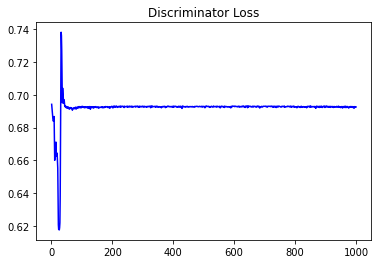

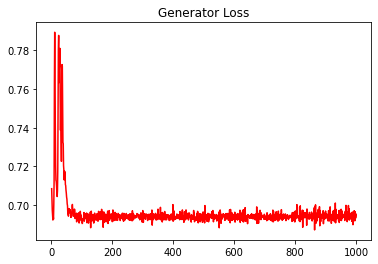

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.007972242506578252


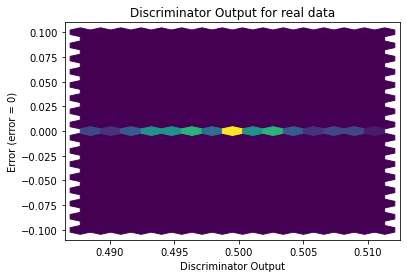

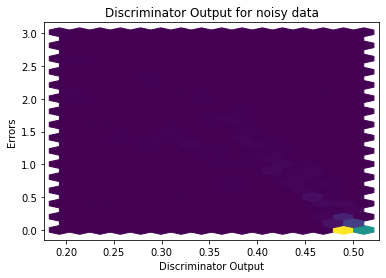

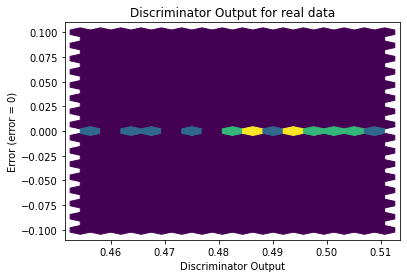

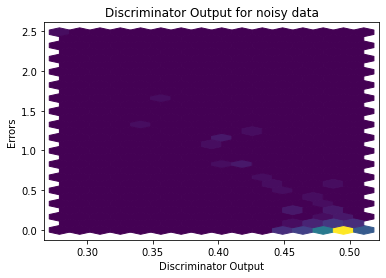

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


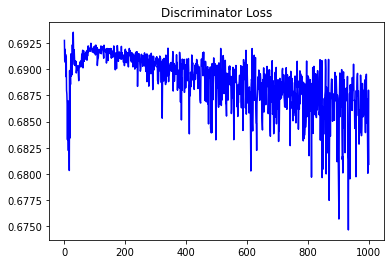

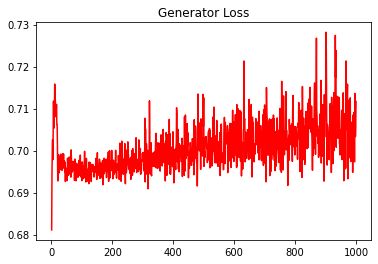

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008394497901576611


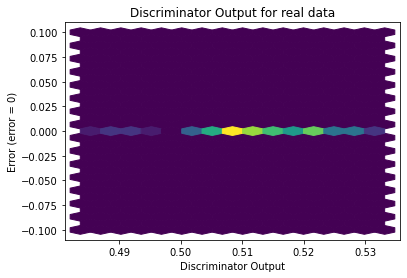

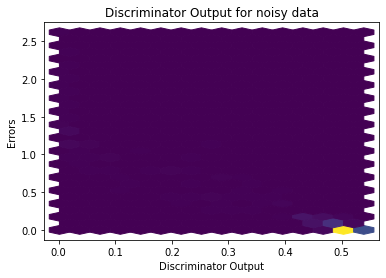

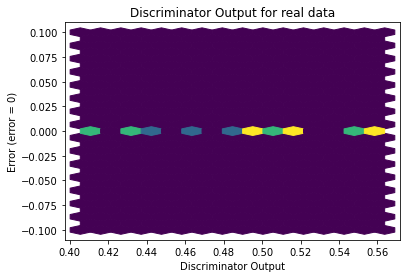

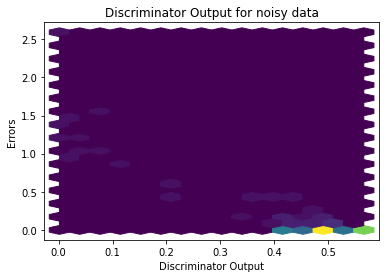

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1146]], requires_grad=True)
